# Explore the landcover mapping for a small test file that has been classified and for the full landcover for 2018


Test files can be found https://universityofcambridgecloud.sharepoint.com/:f:/r/sites/ESC_FireProject-AI4ER/Shared%20Documents/General/Data/Landcover%20mapping/Test_area/Classified_files?csf=1&web=1&e=Uvvxt9

Full Landcover mapping data can be cloned from  https://github.com/graceebc9/Fire_data/Classified 

Key for landcover is in technical report, found here https://universityofcambridgecloud.sharepoint.com/:b:/r/sites/ESC_FireProject-AI4ER/Shared%20Documents/General/Polesia_classification_tool_technical_report%20v1.pdf?csf=1&web=1&e=zhOnV3
Next step is to combine this with the mapping, although I believe that for the model we do not need to provide the classification 

The Polesia map split into tiles:

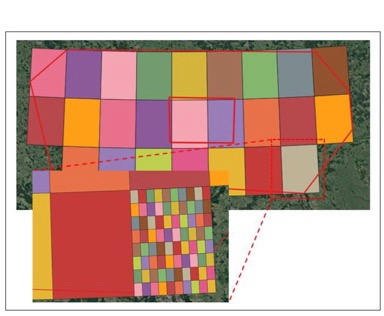

In [73]:
from IPython.display import Image
Image("/Users/gracecolverd/Documents/Fire_Proj/polesia_mapping.jpeg")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import rasterio
from rasterio.plot import show 
import os, glob

import rioxarray
from rioxarray import merge

In [100]:
#define some functions 

def combine_tif_small(file_list, title = ''):
    """Plot the combined image of a set of tif files - limits to ~125 files before datasets close
    file_list = list of files to be merged
    title = title for plot 
    """
    import rioxarray
    from rioxarray import merge
    from rasterio.plot import show 
    
    fig, ax = plt.subplots( figsize=(10,10))

    elements = []

    for val in file_list:
        elements.append(rioxarray.open_rasterio(val))

    merged = merge.merge_arrays(elements, nodata=0.0)

    image = merged.values
    show(image, ax=ax, title = title)

def plot_two_tif(files_1, files_2, title1 ='' , title2 = ''):
    """Plot two combined images side by side, for small lists of files < 125 each   
    files_1 : list of first files 
    files2: list of second files 
    """
    import rioxarray
    from rioxarray import merge
    from rasterio.plot import show 
    
    files = (files_1, files_2)
    titles = (title1, title2)
    image_s = []
    fig, ax = plt.subplots(1,2, figsize=(20,40))
    
    t = 0
    for f in files:
        elements = []
        for val in f:
            elements.append(rioxarray.open_rasterio(val))

        merged = merge.merge_arrays(elements, nodata=0.0)

        image = merged.values
        show(image, ax=ax[t], title = titles[t])
        t=t+1
    

In [101]:
def combine_tif_large(file_list, title=''):
    import rioxarray
    from rioxarray import merge
    from rasterio.plot import show 
    
    """Plot the combined image of a set of tif files - chunks long file list into groups of 100 (n) to prevent datasets closing
    file_list = list of files to be merged
    title = title for plot 
    """
    n= 100 
    fig, ax = plt.subplots( figsize=(20,20))
    chunked_files = [file_list[i:i + n] for i in range(0, len(file_list), n)]
    test = chunked_files[:2]

    final = [] 
    for chunk in chunked_files:
        elements = []
        for val in chunk:
            elements.append(rioxarray.open_rasterio(val))

        merged = merge.merge_arrays(elements, nodata=0.0)
        final.append(merged)

    merge_final = merge.merge_arrays(final, nodata=0.0)
    image = merge_final.values
    show(image, ax = ax, title= title)  
    

In [91]:
#list all files in simple and complex mapping for later combination 
simpel = glob.glob('/Users/gracecolverd/Documents/Fire_Proj/Test/Classified/*Simple.tif')
comple = glob.glob('/Users/gracecolverd/Documents/Fire_Proj/Test/Classified/*Complex.tif')

simple_polesia = glob.glob('/Users/gracecolverd/Documents/Fire_Proj/JASMIN/Fire_data/Classified/*Simple.tif')
complex_polesia = glob.glob('/Users/gracecolverd/Documents/Fire_Proj/JASMIN/Fire_data/Classified/*Complex.tif')

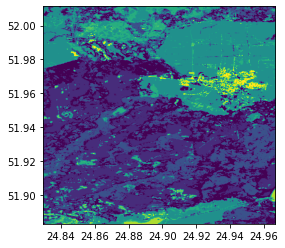

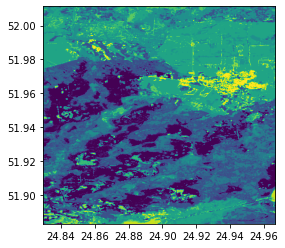

<AxesSubplot:>

In [73]:
#plot a simple and complex tile
simple = '/Users/gracecolverd/Documents/Fire_Proj/Test/Classified/PArea1_tile9_RF_2018_Simple.tif'
compl = '/Users/gracecolverd/Documents/Fire_Proj/Test/Classified/PArea1_tile9_RF_2018_Complex.tif' 

img = rasterio.open(simple)
img2 = rasterio.open(compl)

show(img)
show(img2)

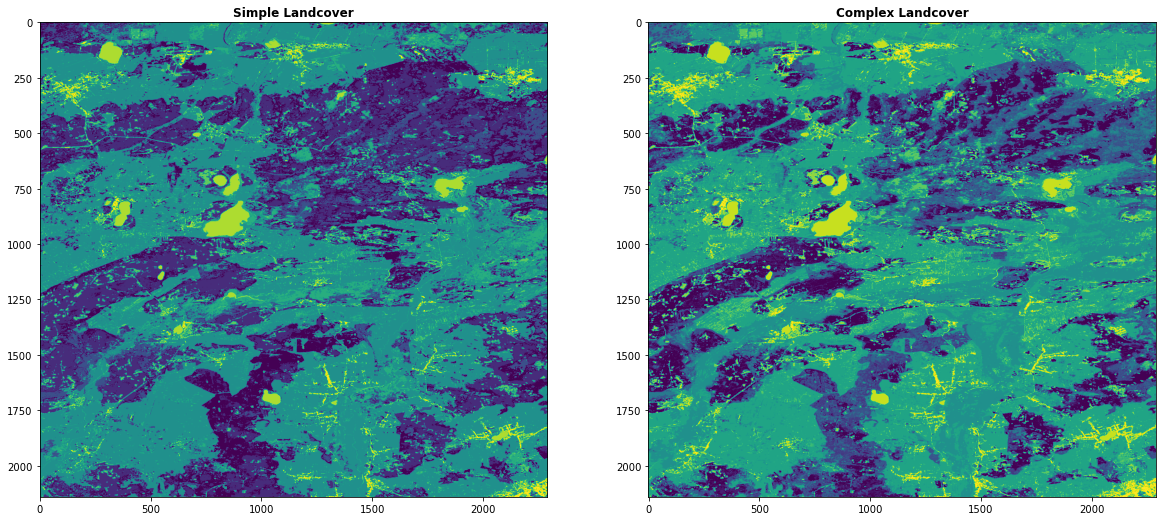

In [10]:
plot_two_tif(simpel, comple, 'Simple Landcover'  ,'Complex Landcover')

# Plotting the simple and complex land cover for all Polesia
There is one central tile missing from the simple verison - parea23_33- likely due to lack of band of satellite data 


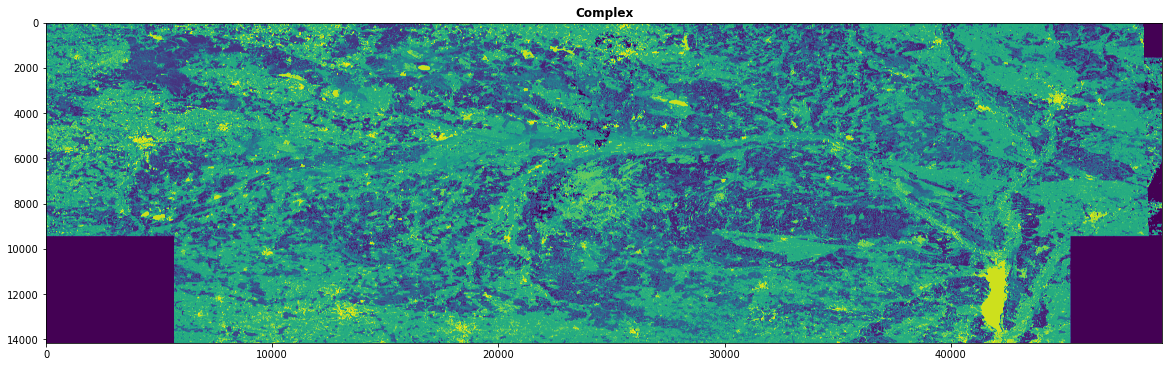

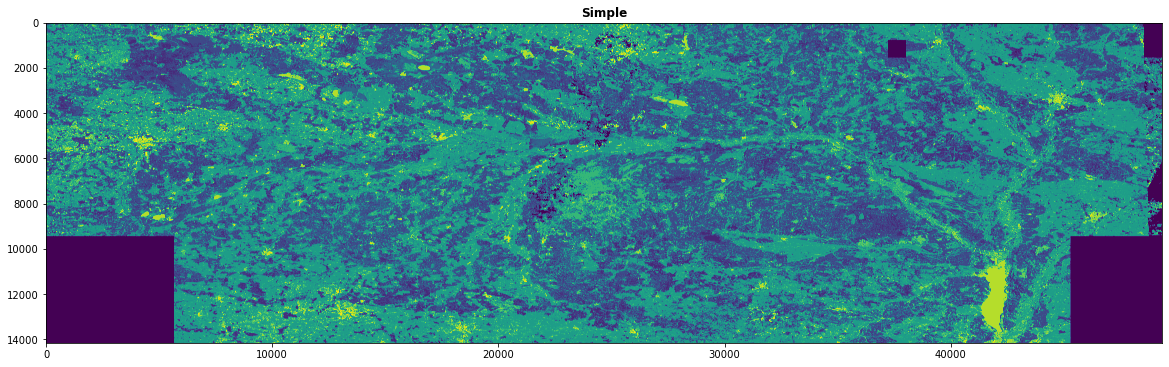

In [93]:
combine_tif_large(complex_polesia, title= 'Complex')
combine_tif_large(simple_polesia, title = 'Simple')

# Looking at the Complex landcover map in QGIS
I compare the landcover TIFs (black and white) to the SHP processing areas generated (colourful squares). The RHS where landcover is missing is likley due to a missing band from the Satellite data, e.g. no vegetation. This only overlaps with the 'whole_map' shapefile by a small amount as seen in the bottom image below with the yellow shapefile superimposed 

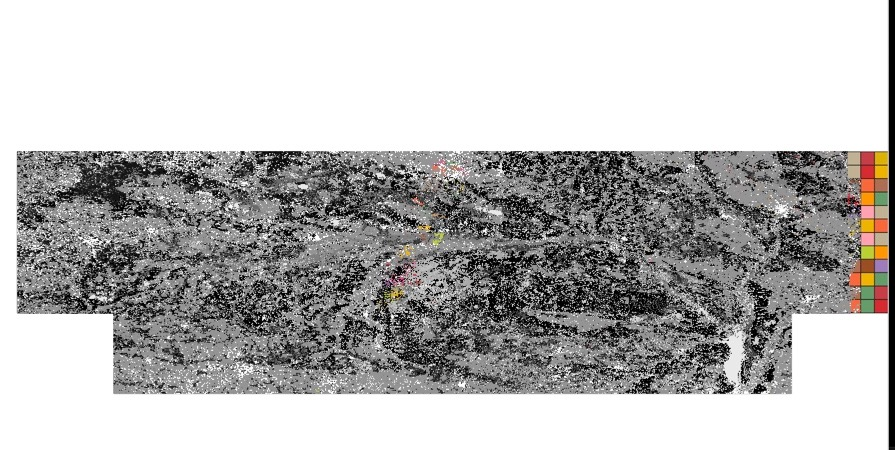

In [98]:
Image('/Users/gracecolverd/Documents/Fire_Proj/Image 10-01-2022 at 17.59.jpeg')

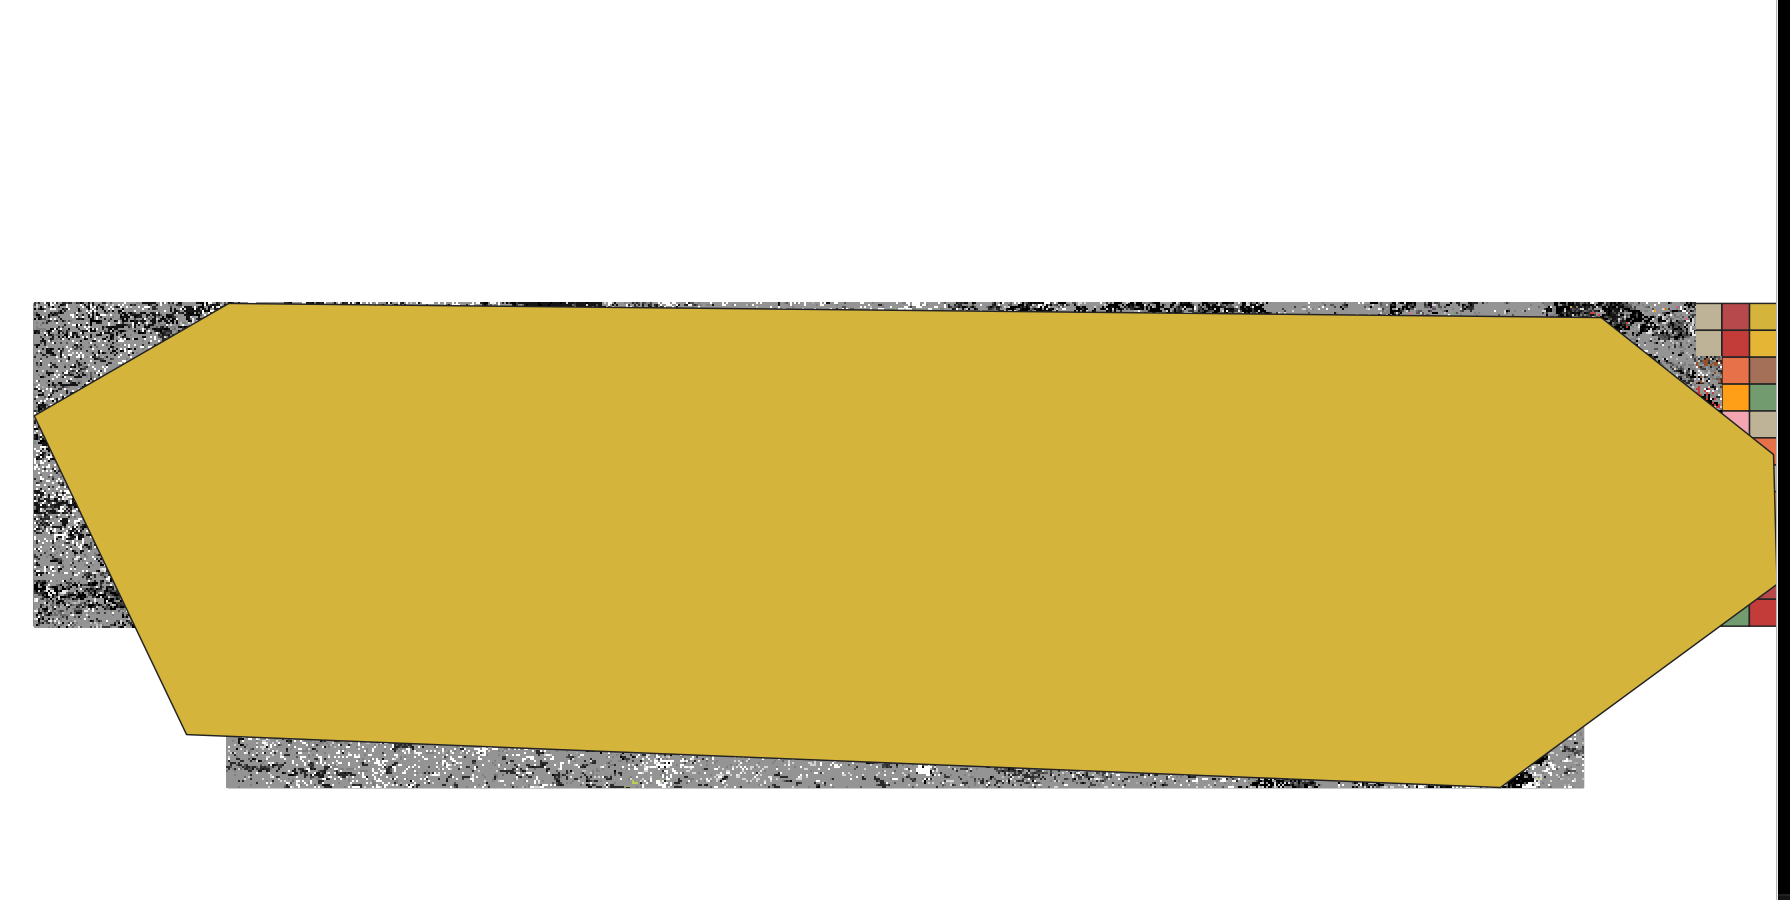

In [99]:

Image('/Users/gracecolverd/Documents/Fire_Proj/Polesia-mapping-landcover.png')